# Instalar
pip install scipy

pip install scikit-learn

# Regresión Logística

Actualmente uno de los algoritmos más ampliamente usados en el problema de clasificación es el de regresión
logı́stica. Algunos ejemplos del problema de clasificación son:

email ¿spam / no spam ?

llamada ¿spam / no spam ?


transacción en lı́nea ¿fraudulenta (sı́ / no)?

tumor ¿maligno / benigno?

En todos los problemas de clasificación simple tenemos una variable  $y \in \{0,1\}$,

donde: $y=\begin{cases}
0:& \text{clase negativa, ejemplo tumor benigno},\\
1:& \text{clase positiva, ejemplo tumor maligno}.
\end{cases}$

También está el problema de clasificación multiclase, donde tenemos varios posibles casos de clasificación, ejemplo clasificar el canto de un pájaro:
$y \in \{0,1,2,3,4,5\}$,

donde: $y=\begin{cases}
0:& \text{clase negativa, ejemplo no es ningún canto},\\
1:& \text{clase  1,  canto gorrión},\\
2:& \text{clase  2,  canto golondrina},\\
3:& \text{clase  3,  canto jilguero},\\
4:& \text{clase  4,  canto canario},\\
5:& \text{clase  5,  canto chachalaca},
\end{cases}$

otro ejemplo, tipo de email:
$y \in \{1,2,3,4\}$,

donde: $y=\begin{cases}
1:& \text{clase  1, trabajo},\\
2:& \text{clase  2, amigos},\\
3:& \text{clase  3, familia},\\
4:& \text{clase  4, hobby}.
\end{cases}$

otro ejemplo, pronosticar el tiempo:
$y \in \{1,2,3,4\}$,

donde: $y=\begin{cases}
1:& \text{clase  1, soleado},\\
2:& \text{clase  2, nublado},\\
3:& \text{clase  3, lluvia},\\
4:& \text{clase  4, nieve}.
\end{cases}$

Sin embargo, como veremos más adelante el problema de clasificación múltiple puede construirse a partir del problema de clasificación simple, el cual es: y = 0 ó 1

## Clasificador
Entrenamientos (tamano del tumor - maligno), 
Tenemos los siguientes entrenamientos:

 1.00000000e+00 0.00000000e+00
 
 2.00000000e+00 0.00000000e+00
 
 3.00000000e+00 0.00000000e+00
 
 4.00000000e+00 0.00000000e+00
 
 6.00000000e+00 1.00000000e+00
 
 7.00000000e+00 1.00000000e+00
 
 8.00000000e+00 1.00000000e+00
 
 9.00000000e+00 1.00000000e+00
 
 
 Que nos da la siguiente gráfica:

 
 <img src="imagenes/tumor.png" width="600" height="300">
 
 Buscando nuestra $\hat{y}$ y graficando, quedaría así:
 
 <img src="imagenes/tumor2.png" width="600" height="300">
 
 Como acabamos de ver, la regresión lineal como tal, no nos sirve para decidir si el tamaño del tumor es maligno o no.

Debido principalmente a que el problema de clasificación esta acotada a: $y= \{0 \text{ ó } 1\}$

mientras que la $\hat{y}$ es una ecuación que no esta acotada.

## Regresión Logística

Lo que hacemos entonces es usar un algoritmo de clasificación conocido como regresión logística, donde: $0 \leq \hat{y} \leq 1$ 

básicamente lo que se hace es convertir nuestra $\hat{y}= b + \omega X$ del modelo de regresión lineal, al nuevo modelo de regresión logística: $\hat{y} = \sigma(b + \omega X)$, donde $\sigma(z)=\frac{1}{1+e^{-z}}$

Donde ahora $\hat{y} = P(Y=1 | X)$

por lo que quedaría nuestra nueva hipótesis de regresión logística de la siguiente manera:  $\hat{y}=\frac{1}{1+e^{- (b + \omega X)}}$, de ésta manera acotamos la hipótesis a los valores intermedios entre 0 y 1; ya que la gráfica de ésta ecuación es asintótica a 0 y 1; como se ve en la siguiente gráfica.

<img src="imagenes/regresionLogistica.png" width="600" height="300">


 La interpretación de lo anterior es que nuestra hipótesis $\hat{y}$ nos da la probabilidad estimada de que $Y=1$ en una entrada $X$

Ejemplo: si $x=\biggl[\begin{matrix}b\\X_1\end{matrix}\biggr]=
\biggl[\begin{matrix}1\\\text{tamaño del tumor}\end{matrix}\biggr]
$

si $\hat{y}=0.7$

Indicaría al paciente que tiene un 70\% de que el tumor sea maligno.

Sabemos que:
\begin{align}
 \hat{y}=\sigma(b+ \omega^TX) \\
 \sigma(z)=\frac{1}{1+e^{-z}}
\end{align}

Supón que queremos predecir que $\hat{y}=1$, como vemos en la imagen de $\sigma(z)$, ésto sucede cuando $\hat{y} \geq 0.5$; lo que a su vez sucede cuando $b + \omega^Tx \geq 0$

Para predecir que $\hat{y}=0$, como vemos ésto sucede cuando $\hat{y} < 0.5$; lo que a su vez sucede cuando $b +\omega^Tx < 0$

## Ejemplo 1

 
 

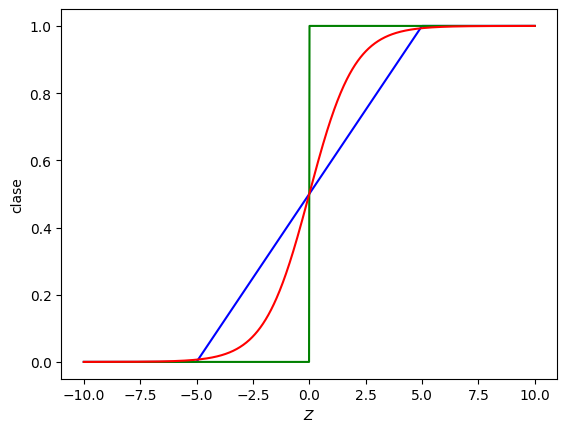

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def sigmoide(v):
    return 1/(1+np.exp(-v))

def escalon(v):
    return np.where(v < 0, 0, 1)

def rampa(v):
    Y = np.where(v < -5, 0, np.where(v > 5, 1, .5+v/10))
    return Y


x = np.linspace(-10,10,1000)
#y = sigmoide(x)
#y = escalon(x)
y = rampa(x)

plt.plot(x,rampa(x),'b-')
plt.plot(x,escalon(x),'g-')
plt.plot(x,sigmoide(x),'r-')
plt.xlabel("$Z$")
plt.ylabel("clase")
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


datos = pd.read_csv("./datos/fronteralinealdecision.csv")
datos = datos.to_numpy()
#print(f"datos= \n{datos}")
m,n = datos.shape
X = datos[:,0:n-1]
Y = datos[:,n-1:n]
X0 = [j for j in range(m) if Y[j]==0]
X1 = [j for j in range(m) if Y[j]==1]
print(f"X0= \n{X0}")
print(f"X1= \n{X1}")

plt.plot(X[X0,0],X[X0,1],"bo")
plt.plot(X[X1,0],X[X1,1],"ro")
plt.xlabel("$X1$")
plt.ylabel("X2")
plt.grid()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './datos/fronteralinealdecision.csv'

Si suponemos que $\hat{y}= \sigma(b + \omega_1 x_1 + \omega_2 x_2)$

Por lo pronto supondremos  también los valores de los parámetros con los siguientes valores:

\begin{align}
b = -3 \\
\omega_1 = 1 \\
\omega_2 = 1 \\
\end{align}

entonces tenemos: $\hat{y} = \sigma(-3+ x_1 + x_2)$

Si queremos predecir cuando $\hat{y}=1$, entonces como habíamos mencionado ésto sucede cuando $\hat{y} \geq 0.5$; lo que a su vez sucede cuando $b + \omega^TX \geq 0$, y sí $b + \omega^TX = -3+ x_1 + x_2$, por lo que $\hat{y} =1$, cuando: $-3+ x_1 + x_2 \geq 0$; es decir cuando $x_1 + x_2 \geq 3$; que nos da la siguiente frontera lineal de decisión.

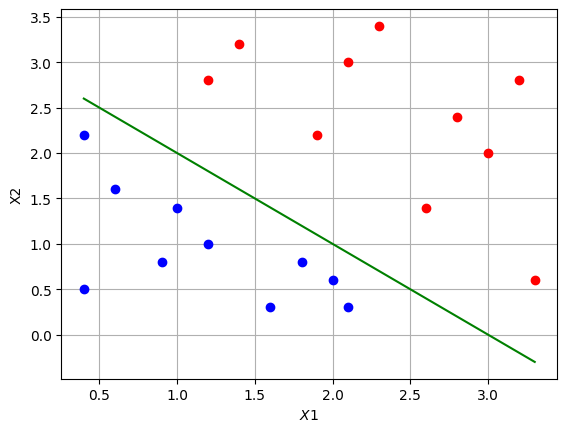

In [2]:
minimo = np.min(X[:,0])
maximo = np.max(X[:,0])
#print(minimo)
#print(maximo)
X2 = np.linspace(minimo, maximo, 100)
X3 = [3-X2[j] for j in range(100)]
#print(X2)
#print(X3)
plt.plot(X[X0,0],X[X0,1],"bo")
plt.plot(X[X1,0],X[X1,1],"ro")
plt.plot(X2,X3,"g-")
plt.xlabel("$X1$")
plt.ylabel("X2")
plt.grid()
plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Programa para crear el dato de prueba
ancho_X = 20
alto_Y = 20
tope = 3
X = np.ones([ancho_X * alto_Y, 2])
for i in range(ancho_X):
    for j in range(alto_Y):
        X[alto_Y*i+j,0] = i*tope/ancho_X#X1
        X[alto_Y*i+j,1] = j*tope/ancho_X#X2
        #X[alto_Y*i+j,2] = 0.5    #Y
df = pd.DataFrame(X)
df.to_csv("./datos/datosPrueba2.csv",index=False)


OSError: Cannot save file into a non-existent directory: 'datos'

datos= 
(400, 2)
X= 
(400, 2)


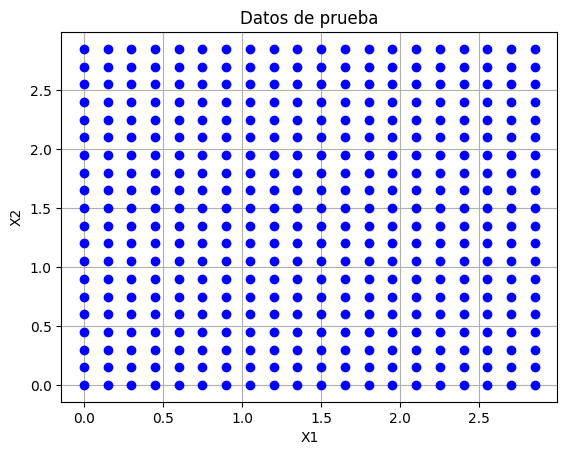

W= 
(2, 1)
Yp= 
[[0.04742587]
 [0.05468132]
 [0.06297336]
 [0.07242649]
 [0.0831727 ]
 [0.09534946]
 [0.10909682]
 [0.12455336]
 [0.14185106]
 [0.16110895]
 [0.18242552]
 [0.20587037]
 [0.23147522]
 [0.2592251 ]
 [0.2890505 ]
 [0.3208213 ]
 [0.35434369]
 [0.38936077]
 [0.42555748]
 [0.46257015]
 [0.05468132]
 [0.06297336]
 [0.07242649]
 [0.0831727 ]
 [0.09534946]
 [0.10909682]
 [0.12455336]
 [0.14185106]
 [0.16110895]
 [0.18242552]
 [0.20587037]
 [0.23147522]
 [0.2592251 ]
 [0.2890505 ]
 [0.3208213 ]
 [0.35434369]
 [0.38936077]
 [0.42555748]
 [0.46257015]
 [0.5       ]
 [0.06297336]
 [0.07242649]
 [0.0831727 ]
 [0.09534946]
 [0.10909682]
 [0.12455336]
 [0.14185106]
 [0.16110895]
 [0.18242552]
 [0.20587037]
 [0.23147522]
 [0.2592251 ]
 [0.2890505 ]
 [0.3208213 ]
 [0.35434369]
 [0.38936077]
 [0.42555748]
 [0.46257015]
 [0.5       ]
 [0.53742985]
 [0.07242649]
 [0.0831727 ]
 [0.09534946]
 [0.10909682]
 [0.12455336]
 [0.14185106]
 [0.16110895]
 [0.18242552]
 [0.20587037]
 [0.23147522]
 [0.

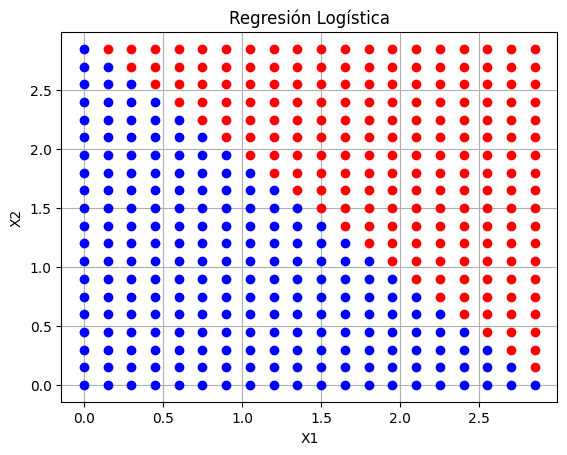

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def sigmoide(t):
    return 1/(1+np.exp(-t))
  

def getPrediccionRL(b, W, X):
    Yp = sigmoide((np.dot(X, W)+b))
    return Yp

datos = pd.read_csv("./datos/datosPrueba2.csv")
#datosPrueba
#fronteralinealdecision
datos = datos.to_numpy()
m,n = datos.shape
X = datos
#Y = datos[:,n-1:n]
print(f"datos= \n{datos.shape}")
print(f"X= \n{X.shape}")
#print(f"Y= \n{Y.shape}")
plt.plot(X[:,0],X[:,1],"bo")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.title("Datos de prueba")
plt.show()

b = -3
W = np.ones([2,1])
#W[1,0] = 1
print(f"W= \n{W.shape}")


Yp = getPrediccionRL(b, W, X)
print(f"Yp= \n{Yp}")
#print(f"W= \n{W}")
#print(f"X= \n{X}")

X0 = [j for j in range(m) if Yp[j] < 0.5]
X1 = [j for j in range(m) if Yp[j] >= 0.5]


plt.plot(X[X0,0],X[X0,1],"bo")
plt.plot(X[X1,0],X[X1,1],"ro")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.title("Regresión Logística")
plt.show()




## Frontera No-Lineal de Decisión


datos= 
[[-0.8  0.2  0. ]
 [-0.9 -0.1  0. ]
 [ 0.8  0.1  0. ]
 [ 0.   0.9  0. ]
 [ 0.  -0.9  0. ]
 [ 0.3  0.7  0. ]
 [ 0.2  0.4  0. ]
 [ 0.3 -0.7  0. ]
 [ 0.2 -0.4  0. ]
 [ 0.5  0.3  0. ]
 [ 0.5 -0.3  0. ]
 [-0.3  0.7  0. ]
 [-0.3 -0.7  0. ]
 [-0.2  0.4  0. ]
 [-0.2 -0.4  0. ]
 [-0.5  0.3  0. ]
 [-0.5 -0.3  0. ]
 [-0.1  0.1  0. ]
 [-0.1 -0.1  0. ]
 [ 0.1  0.1  0. ]
 [ 0.1 -0.1  0. ]
 [ 0.5  1.6  1. ]
 [ 0.5 -1.6  1. ]
 [-0.5 -1.6  1. ]
 [-0.5  1.6  1. ]
 [ 1.8  0.7  1. ]
 [ 1.8 -0.7  1. ]
 [-1.4  0.4  1. ]]


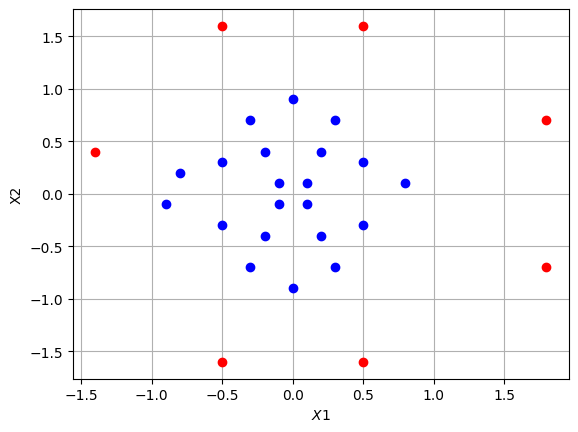

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


datos = pd.read_csv("./datos/fronteranolinealdecision.csv")
datos = datos.to_numpy()
print(f"datos= \n{datos}")
m,n = datos.shape
X = datos[:,0:n-1]
Y = datos[:,n-1:n]
X0 = [j for j in range(m) if Y[j]==0]
X1 = [j for j in range(m) if Y[j]==1]
#print(f"X0= \n{X[X0,0]}")
#print(f"X1= \n{X1}")

plt.plot(X[X0,0],X[X0,1],"bo")
plt.plot(X[X1,0],X[X1,1],"ro")
plt.xlabel("$X1$")
plt.ylabel("X2")
plt.grid()
plt.show()

Si suponemos que $\hat{y}= \sigma(b + \omega_1 X_1 + \omega_2 X_2 + \omega_3 X_1^2 + \omega_4 X_2^2)$

Por lo pronto supondremos  también los valores de $\omega_i$, con los siguientes valores:
\begin{align}
 b = -1 \\
 \omega_1= 0 \\
 \omega_2= 0 \\
 \omega_3= 1 \\
 \omega_4= 1 \\
\end{align}

entonces tenemos: $\hat{y}= \sigma(-1+ X_1^2 + X_2^2)$

Si queremos predecir cuando $\hat{y}=1$, entonces como habíamos mencionado ésto sucede cuando $\hat{y} \geq 0.5$; lo que a su vez sucede cuando $b +\omega^TX \geq 0$, y sí $b + \omega^TX = -1+ X_1^2 + X_2^2$}, por lo que $\hat{y}=1$, cuando: $-1+ X_1^2 + X_2^2 \geq 0$; es decir cuando $b + X_1^2 + X_2^2 \geq 1$; que nos da la siguiente frontera lineal de decisión.

-0.9
0.8


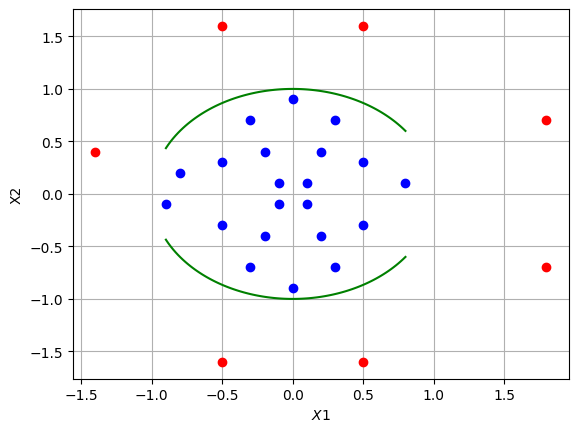

In [44]:
minimo = np.min(X[X0,0])
maximo = np.max(X[X0,0])
print(minimo)
print(maximo)
X2 = np.linspace(minimo, maximo, 100)
X3 = [np.sqrt(1-X2[j]**2) for j in range(100)]
X4 = [-np.sqrt(1-X2[j]**2) for j in range(100)]
#print(X2)
#print(X3)
plt.plot(X[X0,0],X[X0,1],"bo")
plt.plot(X[X1,0],X[X1,1],"ro")
plt.plot(X2,X3,"g-")
plt.plot(X2,X4,"g-")
plt.xlabel("$X1$")
plt.ylabel("X2")
plt.grid()
plt.show()

## Ejercicio de mezcla (borrar al final...)

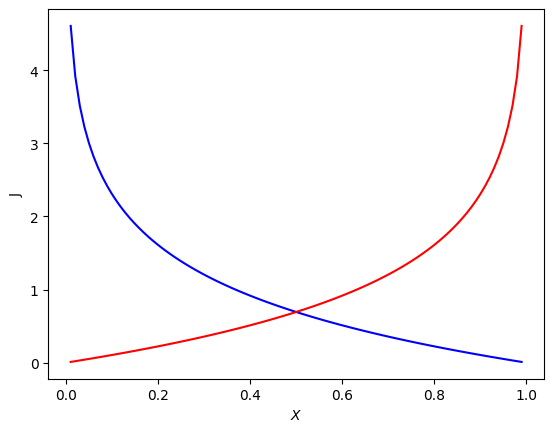

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def sigmoide(v):
    return 1/(1+np.exp(-v))

def escalon(v):
    return np.where(v < 0, 0, 1)

def rampa(v):
    Y = np.where(v < -5, 0, np.where(v > 5, 1, .5+v/10))
    return Y

def yes1(y):
    return -np.log(y)

def yes0(y):
    return -np.log(1-y)

def yesany(yp,y):
    return -y*np.log(yp)-(1-y)*np.log(1-yp)


x = np.linspace(0.01,0.99,100)
#y = sigmoide(x)
#y = escalon(x)
y = rampa(x)

plt.plot(x,yesany(x,1),'b-')
plt.plot(x,yesany(x,0),'r-')
plt.xlabel("$X$")
plt.ylabel("J")
plt.show()

# Función de Costo


Hasta este momento hemos visto los ejemplos con los valores de los parámetros resueltos, sin embargo, ¿cómo escogemos los valores correctos de los parámetros?

Repasando como calculábamos la función de costo en regresión lineal:


$J=\frac{1}{m}{‎‎\sum}_{i=1}^m \mathscr{L}^i $

y donde:

$\mathscr{L} = \frac{1}{2}(\hat{y}-y)^2 $

$\hat{y}=\sigma(b+ \omega^TX)$

$\sigma(z)=\frac{1}{1+e^{-z}}$

Necesitamos un algoritmo nuevamente para buscar los valores de $\omega$; y el algoritmo que veremos es similar al de descenso del gradiente que vimos en regresión lineal; con la diferencia de que el error calculado ya no es la diferencia entre la hipótesis y la salida del entrenamiento $Y$; dado que ahora $Y$ tiene solamente 2 valores posibles.

Ahora el error lo calcularemos de la siguiente manera:

Donde: $\mathscr{L}= \begin{cases}
si\;y=1:& -log(\hat{y}) \\
si\;y=0:& -log(1-\hat{y}) \\
\end{cases}$


Donde la idea es que la penalización que dará el algoritmo a las $\hat{y}$ equivocadas será alta.

 <img src="imagenes/regresionLogistica_costo.png" width="400" height="300"> 
 
 Resumiendo lo anterior, la función de error podría quedar así:
 
 $\mathscr{L}= -Y \cdot log(\hat{y}) -(1-Y) \cdot log(1-\hat{y})$
 
 por lo tanto la función de costo :
 
 $J=\frac{1}{m}{‎‎\sum}_{i=1}^m \mathscr{L}^i $
 
 queda de la siguiente manera:
 
  $J=-\frac{1}{m}{‎‎\sum}_{i=1}^m (y \cdot log(\hat{y}) -(1-y) \cdot log(1-\hat{y}))$

[0.01 0.08 0.15 0.22 0.29 0.36 0.43 0.5  0.57 0.64 0.71 0.78 0.85 0.92
 0.99]


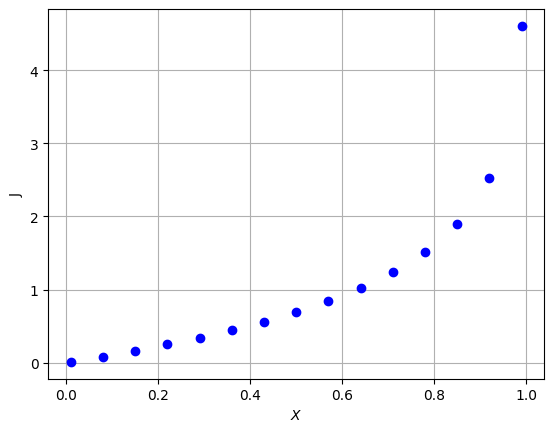

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0.01, .99, 15)
print(X)
Y = -  np.log(1-X)
#print(X2)
#print(X3)
plt.plot(X,Y,"bo")
plt.xlabel("$X$")
plt.ylabel("J")
plt.grid()
plt.show()


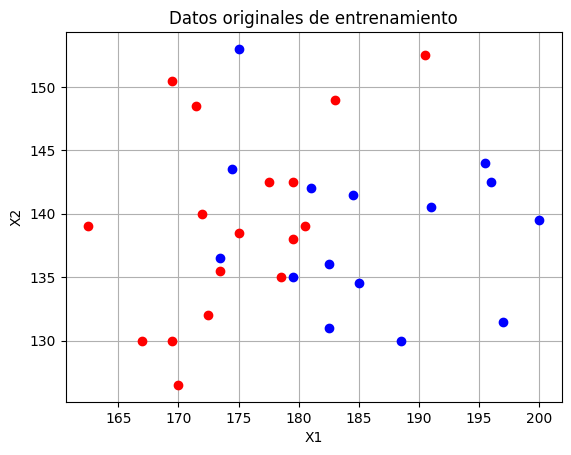

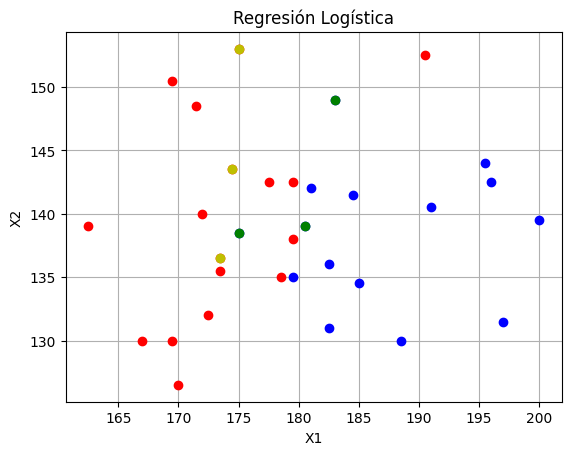

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def escalar(X):
    xmin = np.min(X, axis=0)
    xmax = np.max(X, axis=0)
    xmean = np.mean(X, axis=0)
    xrango = xmax- xmin
    X = ( X - xmean ) / ( xrango )
    return (xmean, xrango, X)

def sigmoide(t):
    return 1/(1+np.exp(-t))
    

def getRL(m,n,X,Y):
    #b = 0
    #W = np.zeros([n-1,1])
    b = np.random.rand()/np.random.rand()
    W = np.random.uniform(-2, 2, size=(n-1, 1))
    alpha = 0.03
    #print(f"Y= {Y} ")
    for iter1 in range(50000):
        yp = sigmoide((np.dot(X, W)+b))
        #print(f"yp= {yp} ")
        acum0 = (Y * np.log(yp)) - (1-Y) * np.log(1-yp)
        #print(f"acum0= {acum0}")
        acum1 = acum0 * X
        acum0 = np.mean(acum0,axis=0)
        acum1 = np.mean(acum1,axis=0)
        acum1 = acum1.reshape([n-1,1])
        b -= acum0 * alpha
        W -= acum1 * alpha
    return b,W

def getPrediccionRL(xmean, xrango, b, W, X):
    X = ( X - xmean ) / ( xrango ) #escalamiento con los parametros xmena y xrango
    Yp = sigmoide((np.dot(X, W)+b))
    return Yp

datos = pd.read_csv("./datos/craneostibet.csv")
#craneostibet
#fronteralinealdecision
#Flor de Iris:
#setosa
#versicolor
#virginica
datos = datos.to_numpy()
#print(f"datos= \n{datos}")
m,n = datos.shape
X = datos[:,0:n-1]
Y = datos[:,n-1:n]


X0 = [j for j in range(m) if Y[j]<=0.5]
X1 = [j for j in range(m) if Y[j]>0.5]


plt.plot(X[X0,0],X[X0,1],"bo")
plt.plot(X[X1,0],X[X1,1],"ro")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.title("Datos originales de entrenamiento")
plt.show()



xmean, xrango, X2 = escalar(X)
b,W = getRL(m,n,X2,Y)
#X = datos[:,0:n-1]
Yp = getPrediccionRL(xmean, xrango, b, W, X)
#print(f"b= {b}")
#print(f"W= {W}")
#print(f"Yp= \n{Yp}")

X0 = [j for j in range(m) if Yp[j]<=0.5]
X1 = [j for j in range(m) if Yp[j]>0.5]

# Índices de puntos azules y rojos en la primera gráfica
X0_primero = [j for j in range(m) if Y[j] <= 0.5]
X1_primero = [j for j in range(m) if Y[j] > 0.5]
X0_segundo = [j for j in range(m) if Yp[j] <= 0.5]
X1_segundo = [j for j in range(m) if Yp[j] > 0.5]

#Encontrar indices que cambian de azul a rojo y de rojo a azul
azul_a_rojo = sorted(list(set(X0_primero) & set(X1_segundo)))
rojo_a_azul = sorted(list(set(X1_primero) & set(X0_segundo)))


#Imprimir indices y posiciones
#print("Puntos falsos positivos:")
for idx in azul_a_rojo:
    #print(f"Indice: {idx}, posicion: (X1: {X[idx, 0]}, X2: {X[idx, 1]})")
    pass
#print("Puntos falsos negativos:")
for idx in rojo_a_azul:
    #print(f"Indice: {idx}, posicion: (X1: {X[idx, 0]}, X2: {X[idx, 1]})")
    pass

plt.plot(X[X0,0],X[X0,1],"bo")
plt.plot(X[X1,0],X[X1,1],"ro")
plt.plot(X[azul_a_rojo,0],X[azul_a_rojo,1],"oy")
plt.plot(X[rojo_a_azul,0],X[rojo_a_azul,1],"og")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.title("Regresión Logística")
plt.show()

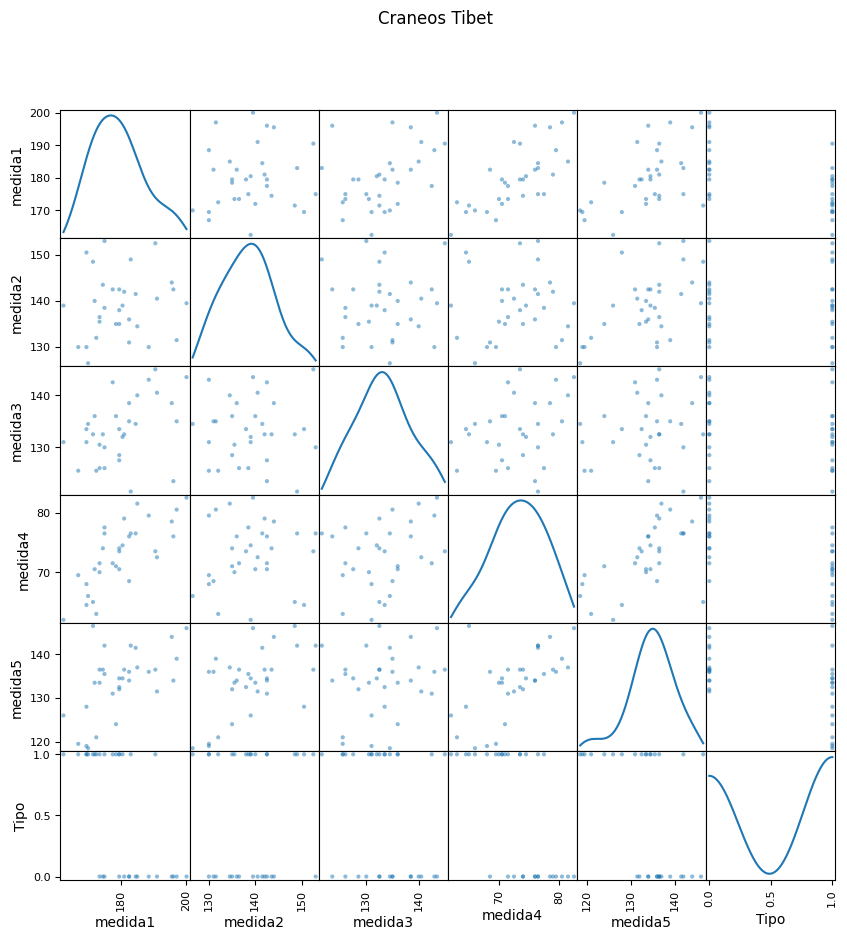

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./datos/craneostibet.csv")

# Crear la matriz de gráficos de dispersión
pd.plotting.scatter_matrix(df, figsize=(10, 10), diagonal='kde')

# Mostrar el gráfico
plt.suptitle('Craneos Tibet')
plt.show()

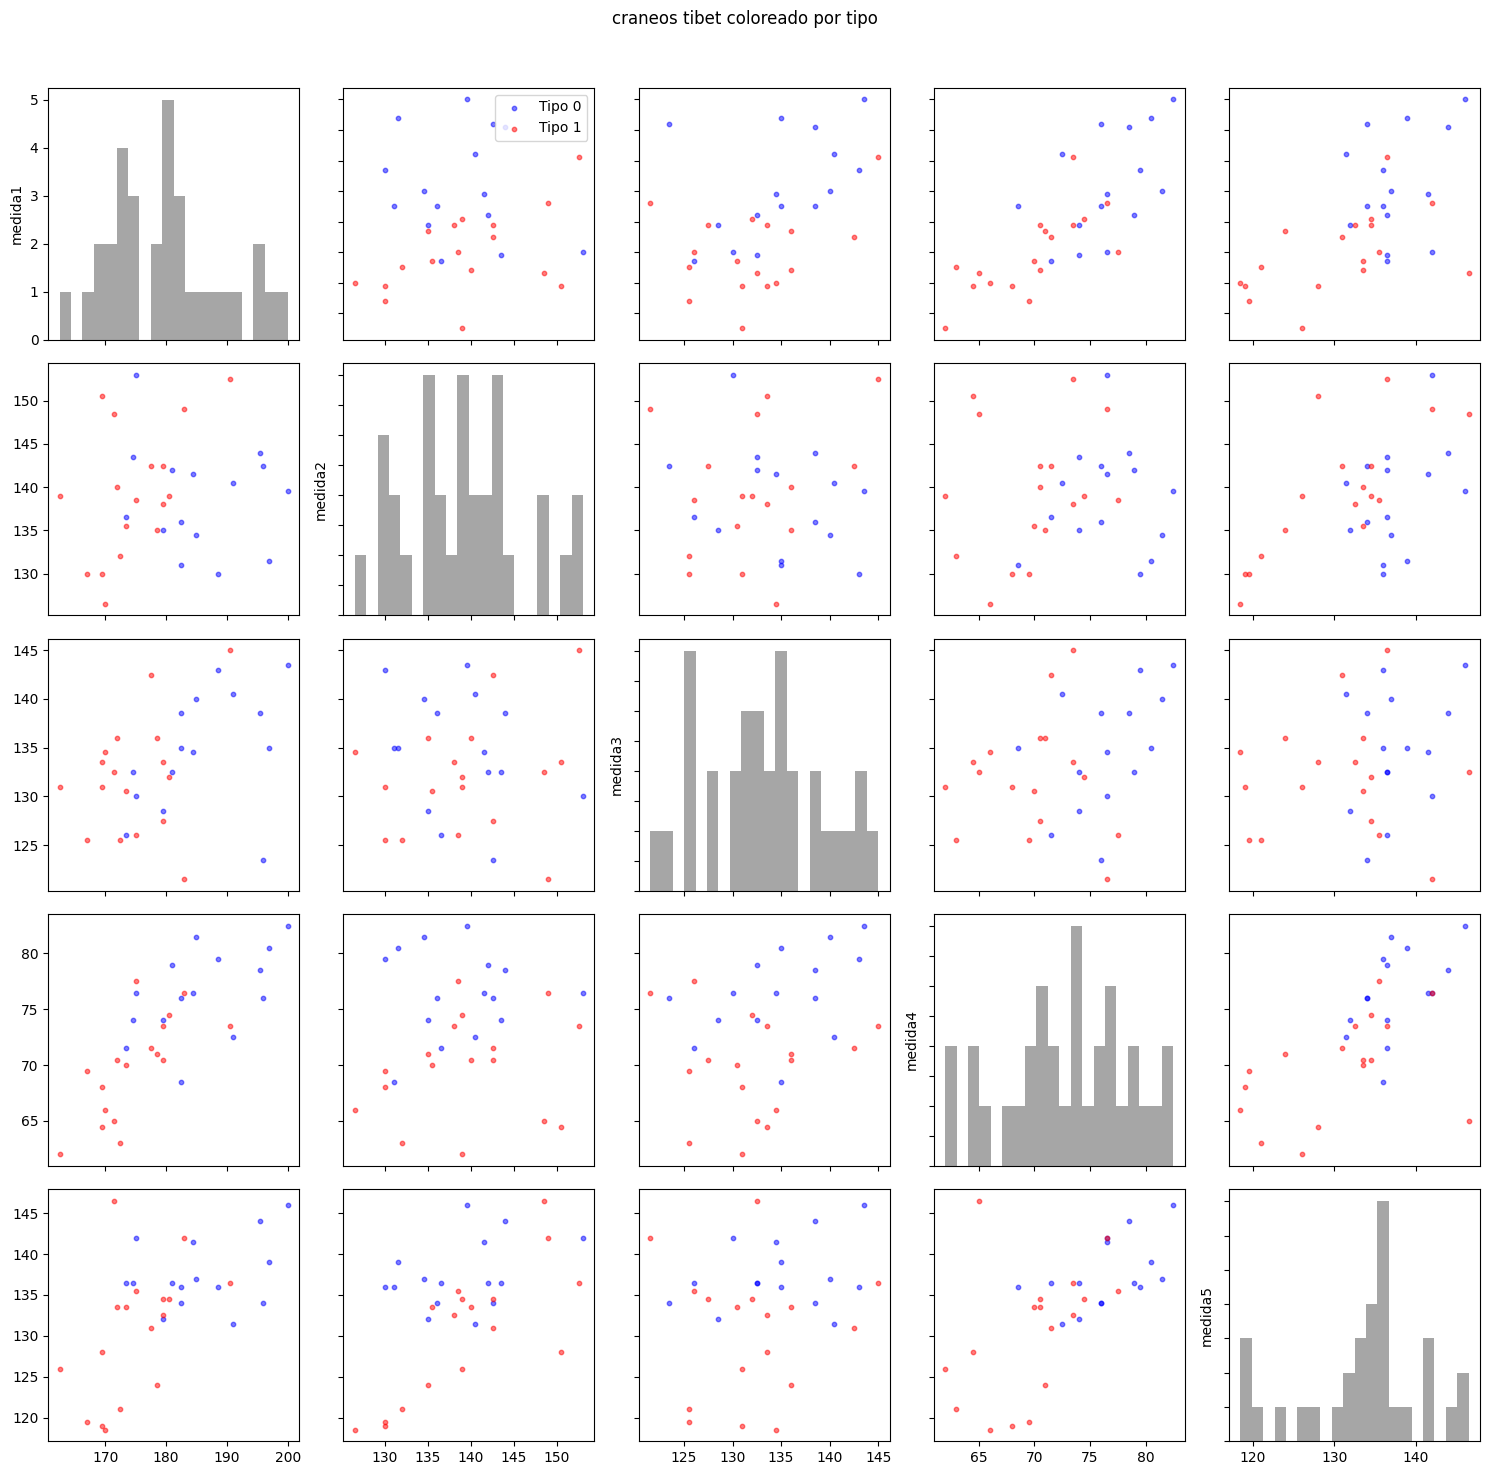

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./datos/craneostibet.csv")


# Crear la matriz de gráficos de dispersión
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))
fig.suptitle('craneos tibet coloreado por tipo')

# Iterar sobre cada par de columnas para graficar
for i in range(5):
    for j in range(5):
        ax = axes[i, j]
        if i == j:
            # Diagonal
            ax.hist(df.iloc[:, i], bins=20, color='gray', alpha=0.7)
            ax.set_ylabel(df.columns[i])
        else:
            # Off-diagonal
            ax.scatter(df[df['Tipo'] == 0].iloc[:, j], df[df['Tipo'] == 0].iloc[:, i], color='blue', alpha=0.5, label='Tipo 0', s=10)
            ax.scatter(df[df['Tipo'] == 1].iloc[:, j], df[df['Tipo'] == 1].iloc[:, i], color='red', alpha=0.5, label='Tipo 1', s=10)

        # Solo agregar leyenda a la primera gráfica
        if i == 0 and j == 1:
            ax.legend(loc='upper right')

        # Quitar las etiquetas de los ejes para gráficos no en los bordes
        if i < 4:
            ax.set_xticklabels([])
        if j > 0:
            ax.set_yticklabels([])

# Mostrar el gráfico
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Flor Iris